Importing the libraries

In [1]:
import pandas_datareader.data as web
import matplotlib.pyplot as plt
import pandas as pd
from datetime import date
import copy
pd.plotting.register_matplotlib_converters()

Api key

In [2]:
ALPHAVANTAGE_API_KEY = 'TBWN7EF5RQZXTIWU' #required api key

Setting start and end date

In [3]:
start_date = date(2016, 3, 6)
end_date = date(2021, 3, 6)

Importing the top 50 companies csv file

In [4]:
df = pd.read_csv("index_stocks.csv")

In [114]:
df

,Company Name,Company Ticker,Security Code,Investibility weighting factor,Total Shares,Market Cap,Market Share Price,Book Value,Sales (Rs Cr),Unnamed: 8,...,Unnamed: 23,Average Dividends,Book Value percentage,Sales percentage,Cash flow percentage,Dividend percentage,RAFI Fundamental Value,Rafi adjustment factor Ci,Investible Rafi fundamental Value,Company value
0,Total,NaN,0,52.5519,8.240710e+11,NaN,340424.03,"41,83,181",3956034,4439456,...,152233.02,146214.7445,100.00%,1.000000,1.000000,1.000000,1.005173e+07,229876.912000,5.042277e+06,5.031550e+13
1,AXIS BANK LTD,AXISBANK,532215,0.8610,3.064713e+09,2.274017e+05,742.00,86340,"41,409","45,175",...,0,521.3700,2.06%,0.009942,0.132915,0.003566,4.176547e+05,1.836638,3.596007e+05,3.596010e+12
2,RELIANCE INDUSTRIES LTD,RELIANCE,500325,0.4926,6.585844e+09,1.449215e+06,2200.50,613422,"2,72,583","3,03,954",...,3935.4,3553.0620,0.146640081,0.083774,0.033721,0.024300,7.210869e+05,0.497571,3.552074e+05,3.552070e+12
3,HDFC BANK LTD,HDFCBANK,500180,0.7400,5.510632e+09,8.398755e+05,1524.10,176394,63162,73271,...,1362.7,2779.3700,0.042167432,0.017649,0.111460,0.019009,4.757141e+05,0.566410,3.520284e+05,3.520280e+12
4,ICICI BANK LTD,ICICIBANK,532174,0.5254,6.913848e+09,4.185298e+05,605.35,122957,59294,60940,...,0,1188.4120,0.029393182,0.013331,0.173907,0.008128,5.618988e+05,1.342554,2.952216e+05,2.952220e+12
5,KOTAK MAHINDRA BANK LTD,KOTAKBANK,500247,0.7397,1.981946e+09,3.765698e+05,1900.00,67135,20402,22324,...,0,94.1340,0.016048792,0.005155,0.123957,0.000644,3.645102e+05,0.967975,2.696282e+05,2.696280e+12
6,STATE BANK OF INDIA,SBIN,500112,0.4216,8.917687e+09,3.473439e+05,389.50,251060,"2,20,633","2,30,447",...,0,829.6880,0.060016528,0.047288,0.142727,0.005674,6.392651e+05,1.840439,2.695142e+05,2.695140e+12
7,INDIAN OIL CORPORATION LTD,IOC,530965,0.4839,2.053500e+11,5.361679e+05,26.11,73837,346045,355379,...,3902.41,8937.0900,0.017650922,0.083925,0.001786,0.061123,4.112133e+05,0.766949,1.989861e+05,1.989860e+12
8,ITC LTD,ITC,500875,0.8669,1.230491e+10,2.568034e+05,208.70,59083,39192,42768,...,12550.92,7699.4320,0.014123941,0.008770,0.001470,0.052658,1.925544e+05,0.749812,1.669254e+05,1.669250e+12
9,OIL AND NATURAL GAS CORPORATION LTD,ONGC,500312,0.3959,1.256989e+10,1.495816e+05,119.00,209994,"1,24,036","2,82,506",...,6326.06,8112.4560,0.050199597,0.060823,0.001682,0.055483,4.204711e+05,2.810981,1.664645e+05,1.664650e+12


In [31]:
stocks = web.DataReader(ticker, "av-daily", start=start_date, end=date(2021, 3, 6), api_key=ALPHAVANTAGE_API_KEY)

,open,high,low,close,volume
2016-03-08,139.60,139.60,136.05,137.40,160215
2016-03-09,138.00,140.20,136.45,139.55,111308
2016-03-10,139.75,141.00,138.10,139.50,1380805
2016-03-11,137.10,140.25,137.10,138.10,56138
2016-03-14,138.70,138.80,137.65,138.45,51240
...,...,...,...,...,...
2021-03-01,218.50,228.85,217.65,227.55,940032
2021-03-02,228.70,229.50,223.45,224.85,442673
2021-03-03,228.60,230.00,223.70,227.45,378593
2021-03-04,225.00,229.90,224.20,225.10,1122167


In [5]:
cols = [6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24]
df.drop(df.columns[cols],axis=1,inplace=True)

In [9]:
n = 1232
prices = [0]*n
#prices_final = [0]*n

In [10]:
prices = [0]*n
for i in range(1, 5):
    ticker = "BSE:"+df.loc[i, "Security Code"].astype(str)
    try:
        stocks = web.DataReader(ticker, "av-daily", start=start_date, end=date(2021, 3, 6), api_key=ALPHAVANTAGE_API_KEY)
        print(df.loc[i, "Company Ticker"], "code")
    except ValueError as ve:
        ticker = "BSE:"+df.loc[i, "Company Ticker"]
        stocks = web.DataReader(ticker, "av-daily", start=start_date, end=date(2021, 3, 6), api_key=ALPHAVANTAGE_API_KEY)
        print(df.loc[i, "Company Ticker"], "ticker")
    finally:
        for j in range(n):
            prices[j]+=stocks['close'][j]*df.loc[i, "Total Shares"]*df.loc[i, "Investible Rafi fundamental Value"]

AXISBANK code
RELIANCE ticker
HDFCBANK code
ICICIBANK code


In [65]:
for i in range(1232):
    prices_final[i]+=prices[i]

In [66]:
prices_final[0:6]

[7.170345318288804e+19,
 7.2067178033002775e+19,
 7.0534827946449674e+19,
 7.0426468397069165e+19,
 7.036701325459225e+19,
 7.041153293574939e+19]

In [14]:
prices = [0]*n
for i in range(5, 9):
    ticker = "BSE:"+df.loc[i, "Security Code"].astype(str)
    try:
        stocks = web.DataReader(ticker, "av-daily", start=start_date, end=date(2021, 3, 6), api_key=ALPHAVANTAGE_API_KEY)
        print(df.loc[i, "Company Ticker"])
    except ValueError as ve:
        ticker = "BSE:"+df.loc[i, "Company Ticker"]
        stocks = web.DataReader(ticker, "av-daily", start=start_date, end=date(2021, 3, 6), api_key=ALPHAVANTAGE_API_KEY)
        print(df.loc[i, "Company Ticker"], "unsafe")
    finally:
        for j in range(n):
            prices[j]+=stocks['close'][j]*df.loc[i, "Total Shares"]*df.loc[i, "Investible Rafi fundamental Value"]

KOTAKBANK
SBIN
IOC
ITC


In [17]:
prices = [0]*n
for i in range(9, 13):
    ticker = "BSE:"+df.loc[i, "Security Code"].astype(str)
    try:
        stocks = web.DataReader(ticker, "av-daily", start=start_date, end=date(2021, 3, 6), api_key=ALPHAVANTAGE_API_KEY)
        print(df.loc[i, "Company Ticker"])
    except ValueError as ve:
        ticker = "BSE:"+df.loc[i, "Company Ticker"]
        stocks = web.DataReader(ticker, "av-daily", start=start_date, end=date(2021, 3, 6), api_key=ALPHAVANTAGE_API_KEY)
        print(df.loc[i, "Company Ticker"], "unsafe")
    finally:
        for j in range(n):
            prices[j]+=stocks['close'][j]*df.loc[i, "Total Shares"]*df.loc[i, "Investible Rafi fundamental Value"]

ONGC
LT
INFY unsafe
HINDALCO


In [20]:
prices = [0]*n
for i in range(13, 17):
    ticker = "BSE:"+df.loc[i, "Security Code"].astype(str)
    try:
        stocks = web.DataReader(ticker, "av-daily", start=start_date, end=date(2021, 3, 6), api_key=ALPHAVANTAGE_API_KEY)
        print(df.loc[i, "Company Ticker"])
    except ValueError as ve:
        ticker = "BSE:"+df.loc[i, "Company Ticker"]
        stocks = web.DataReader(ticker, "av-daily", start=start_date, end=date(2021, 3, 6), api_key=ALPHAVANTAGE_API_KEY)
        print(df.loc[i, "Company Ticker"], "unsafe")
    finally:
        for j in range(n):
            prices[j]+=stocks['close'][j]*df.loc[i, "Total Shares"]*df.loc[i, "Investible Rafi fundamental Value"]

TCS
TATAMOTORS
BPCL
NTPC


In [23]:
prices = [0]*n
for i in range(17, 20):
    ticker = "BSE:"+df.loc[i, "Security Code"].astype(str)
    try:
        stocks = web.DataReader(ticker, "av-daily", start=start_date, end=date(2021, 3, 6), api_key=ALPHAVANTAGE_API_KEY)
        print(df.loc[i, "Company Ticker"])
    except ValueError as ve:
        ticker = "BSE:"+df.loc[i, "Company Ticker"]
        stocks = web.DataReader(ticker, "av-daily", start=start_date, end=date(2021, 3, 6), api_key=ALPHAVANTAGE_API_KEY)
        print(df.loc[i, "Company Ticker"], "unsafe")
    finally:
        for j in range(n-1):
            prices[j]+=stocks['close'][j]*df.loc[i, "Total Shares"]*df.loc[i, "Investible Rafi fundamental Value"]

COALINDIA
VEDL unsafe
TATASTEEL unsafe


In [26]:
prices = [0]*n
for i in range(20, 23):
    ticker = "BSE:"+df.loc[i, "Security Code"].astype(str)
    try:
        stocks = web.DataReader(ticker, "av-daily", start=start_date, end=date(2021, 3, 6), api_key=ALPHAVANTAGE_API_KEY)
        print(df.loc[i, "Company Ticker"])
    except ValueError as ve:
        ticker = "BSE:"+df.loc[i, "Company Ticker"]
        stocks = web.DataReader(ticker, "av-daily", start=start_date, end=date(2021, 3, 6), api_key=ALPHAVANTAGE_API_KEY)
        print(df.loc[i, "Company Ticker"], "unsafe")
    finally:
        for j in range(n):
            prices[j]+=stocks['close'][j]*df.loc[i, "Total Shares"]*df.loc[i, "Investible Rafi fundamental Value"]

HINDPETRO
M&M unsafe
BHARTIARTL


In [32]:
prices = [0]*n
ticker = "BSE:"+df.loc[23, "Security Code"].astype(str)
try:
    stocks = web.DataReader(ticker, "av-daily", start=start_date, end=date(2021, 3, 6), api_key=ALPHAVANTAGE_API_KEY)
    print(df.loc[23, "Company Ticker"])
except ValueError as ve:
    ticker = "BSE:"+df.loc[23, "Company Ticker"]
    stocks = web.DataReader(ticker, "av-daily", start=start_date, end=date(2021, 3, 6), api_key=ALPHAVANTAGE_API_KEY)
    print(df.loc[i, "Company Ticker"], "unsafe")
finally:
    for j in range(n):
        prices[j]+=stocks['close'][j]*df.loc[23, "Total Shares"]*df.loc[23, "Investible Rafi fundamental Value"]

POWERGRID


In [35]:
prices = [0]*n
for i in range(24, 27):
    ticker = "BSE:"+df.loc[i, "Security Code"].astype(str)
    try:
        stocks = web.DataReader(ticker, "av-daily", start=start_date, end=date(2021, 3, 6), api_key=ALPHAVANTAGE_API_KEY)
        print(df.loc[i, "Company Ticker"])
    except ValueError as ve:
        ticker = "BSE:"+df.loc[i, "Company Ticker"]
        stocks = web.DataReader(ticker, "av-daily", start=start_date, end=date(2021, 3, 6), api_key=ALPHAVANTAGE_API_KEY)
        print(df.loc[i, "Company Ticker"], "unsafe")
    finally:
        for j in range(n):
            prices[j]+=stocks['close'][j]*df.loc[i, "Total Shares"]*df.loc[i, "Investible Rafi fundamental Value"]

INDUSINDBK
HINDUNILVR
GRASIM


In [38]:
prices = [0]*n
for i in range(27, 30):
    ticker = "BSE:"+df.loc[i, "Security Code"].astype(str)
    try:
        stocks = web.DataReader(ticker, "av-daily", start=start_date, end=date(2021, 3, 6), api_key=ALPHAVANTAGE_API_KEY)
        print(df.loc[i, "Company Ticker"])
    except ValueError as ve:
        ticker = "BSE:"+df.loc[i, "Company Ticker"]
        stocks = web.DataReader(ticker, "av-daily", start=start_date, end=date(2021, 3, 6), api_key=ALPHAVANTAGE_API_KEY)
        print(df.loc[i, "Company Ticker"], "unsafe")
    finally:
        for j in range(n):
            prices[j]+=stocks['close'][j]*df.loc[i, "Total Shares"]*df.loc[i, "Investible Rafi fundamental Value"]

JSWSTEEL
GAIL
HCLTECH


In [42]:
prices = [0]*n
for i in range(30, 33):
    ticker = "BSE:"+df.loc[i, "Security Code"].astype(str)
    try:
        stocks = web.DataReader(ticker, "av-daily", start=start_date, end=date(2021, 3, 6), api_key=ALPHAVANTAGE_API_KEY)
        print(df.loc[i, "Company Ticker"])
    except ValueError as ve:
        ticker = "BSE:"+df.loc[i, "Company Ticker"]
        stocks = web.DataReader(ticker, "av-daily", start=start_date, end=date(2021, 3, 6), api_key=ALPHAVANTAGE_API_KEY)
        print(df.loc[i, "Company Ticker"], "unsafe")
    finally:
        for j in range(n):
            prices[j]+=stocks['close'][j]*df.loc[i, "Total Shares"]*df.loc[i, "Investible Rafi fundamental Value"]

MARUTI
UPL unsafe
TECHM


In [46]:
prices = [0]*n
for i in range(33, 36):
    ticker = "BSE:"+df.loc[i, "Security Code"].astype(str)
    try:
        stocks = web.DataReader(ticker, "av-daily", start=start_date, end=date(2021, 3, 6), api_key=ALPHAVANTAGE_API_KEY)
        print(df.loc[i, "Company Ticker"])
    except ValueError as ve:
        ticker = "BSE:"+df.loc[i, "Company Ticker"]
        stocks = web.DataReader(ticker, "av-daily", start=start_date, end=date(2021, 3, 6), api_key=ALPHAVANTAGE_API_KEY)
        print(df.loc[i, "Company Ticker"], "unsafe")
    finally:
        for j in range(n):
            prices[j]+=stocks['close'][j]*df.loc[i, "Total Shares"]*df.loc[i, "Investible Rafi fundamental Value"]

PNB
RECLTD
HEROMOTOCO unsafe


In [49]:
prices = [0]*n
for i in range(36, 39):
    ticker = "BSE:"+df.loc[i, "Security Code"].astype(str)
    try:
        stocks = web.DataReader(ticker, "av-daily", start=start_date, end=date(2021, 3, 6), api_key=ALPHAVANTAGE_API_KEY)
        print(df.loc[i, "Company Ticker"])
    except ValueError as ve:
        ticker = "BSE:"+df.loc[i, "Company Ticker"]
        stocks = web.DataReader(ticker, "av-daily", start=start_date, end=date(2021, 3, 6), api_key=ALPHAVANTAGE_API_KEY)
        print(df.loc[i, "Company Ticker"], "unsafe")
    finally:
        for j in range(n-11):
            prices[j]+=stocks['close'][j]*df.loc[i, "Total Shares"]*df.loc[i, "Investible Rafi fundamental Value"]

YESBANK
BAJAJ-AUTO unsafe
PFC


In [52]:
prices = [0]*n
for i in range(39, 42):
    ticker = "BSE:"+df.loc[i, "Security Code"].astype(str)
    try:
        stocks = web.DataReader(ticker, "av-daily", start=start_date, end=date(2021, 3, 6), api_key=ALPHAVANTAGE_API_KEY)
        print(df.loc[i, "Company Ticker"])
    except ValueError as ve:
        ticker = "BSE:"+df.loc[i, "Company Ticker"]
        stocks = web.DataReader(ticker, "av-daily", start=start_date, end=date(2021, 3, 6), api_key=ALPHAVANTAGE_API_KEY)
        print(df.loc[i, "Company Ticker"], "unsafe")
    finally:
        for j in range(n):
            prices[j]+=stocks['close'][j]*df.loc[i, "Total Shares"]*df.loc[i, "Investible Rafi fundamental Value"]

PEL unsafe
ADANIPORTS
MOTHERSUMI


In [55]:
prices = [0]*n
for i in range(42, 45, 2):
    ticker = "BSE:"+df.loc[i, "Security Code"].astype(str)
    try:
        stocks = web.DataReader(ticker, "av-daily", start=start_date, end=date(2021, 3, 6), api_key=ALPHAVANTAGE_API_KEY)
        print(df.loc[i, "Company Ticker"])
    except ValueError as ve:
        ticker = "BSE:"+df.loc[i, "Company Ticker"]
        stocks = web.DataReader(ticker, "av-daily", start=start_date, end=date(2021, 3, 6), api_key=ALPHAVANTAGE_API_KEY)
        print(df.loc[i, "Company Ticker"], "unsafe")
    finally:
        for j in range(n):
            prices[j]+=stocks['close'][j]*df.loc[i, "Total Shares"]*df.loc[i, "Investible Rafi fundamental Value"]

PETRONET
SUNPHARMA


In [58]:
prices = [0]*n
for i in range(45, 47):
    ticker = "BSE:"+df.loc[i, "Security Code"].astype(str)
    try:
        stocks = web.DataReader(ticker, "av-daily", start=start_date, end=date(2021, 3, 6), api_key=ALPHAVANTAGE_API_KEY)
        print(df.loc[i, "Company Ticker"])
    except ValueError as ve:
        ticker = "BSE:"+df.loc[i, "Company Ticker"]
        stocks = web.DataReader(ticker, "av-daily", start=start_date, end=date(2021, 3, 6), api_key=ALPHAVANTAGE_API_KEY)
        print(df.loc[i, "Company Ticker"], "unsafe")
    finally:
        for j in range(n):
            prices[j]+=stocks['close'][j]*df.loc[i, "Total Shares"]*df.loc[i, "Investible Rafi fundamental Value"]

ACC
ULTRACEMCO unsafe


In [61]:
prices = [0]*n
for i in range(47, 49):
    ticker = "BSE:"+df.loc[i, "Security Code"].astype(str)
    try:
        stocks = web.DataReader(ticker, "av-daily", start=start_date, end=date(2021, 3, 6), api_key=ALPHAVANTAGE_API_KEY)
        print(df.loc[i, "Company Ticker"])
    except ValueError as ve:
        ticker = "BSE:"+df.loc[i, "Company Ticker"]
        stocks = web.DataReader(ticker, "av-daily", start=start_date, end=date(2021, 3, 6), api_key=ALPHAVANTAGE_API_KEY)
        print(df.loc[i, "Company Ticker"], "unsafe")
    finally:
        for j in range(n):
            prices[j]+=stocks['close'][j]*df.loc[i, "Total Shares"]*df.loc[i, "Investible Rafi fundamental Value"]

AMBUJACEM
CIPLA


In [64]:
prices = [0]*n
for i in range(49, 51):
    ticker = "BSE:"+df.loc[i, "Security Code"].astype(str)
    try:
        stocks = web.DataReader(ticker, "av-daily", start=start_date, end=date(2021, 3, 6), api_key=ALPHAVANTAGE_API_KEY)
        print(df.loc[i, "Company Ticker"])
    except ValueError as ve:
        ticker = "BSE:"+df.loc[i, "Company Ticker"]
        stocks = web.DataReader(ticker, "av-daily", start=start_date, end=date(2021, 3, 6), api_key=ALPHAVANTAGE_API_KEY)
        print(df.loc[i, "Company Ticker"], "unsafe")
    finally:
        for j in range(n):
            prices[j]+=stocks['close'][j]*df.loc[i, "Total Shares"]*df.loc[i, "Investible Rafi fundamental Value"]

WIPRO
NMDC


In [159]:
y_val.index(143.20773031683802)

575

In [67]:
#y_val = copy.deepcopy(prices_final)

In [ ]:
base = y_val[0]/100
for i in range(len(y_val)):
    y_val[i]/=base
y_val

In [160]:
temp=y_val[575]
for i in range(575, len(y_val)):
    y_val[i]+=y_val[574]-temp

In [134]:
prices_df = pd.DataFrame(prices_final)
prices_df.to_csv("prices_df.csv", index=False)

In [163]:
final_prices_df = pd.DataFrame(y_val)
final_prices_df.to_csv("final_prices.csv", index=False)

In [158]:
y_val[500:600]

[136.57638071275056,
 136.9444737276902,
 137.32751839545443,
 136.68335795737516,
 136.7113254662474,
 136.24811667794742,
 136.6722823449128,
 135.5808910043683,
 135.5896670011736,
 135.98049331847676,
 134.68470969414784,
 136.33862995077118,
 135.57357422672175,
 134.9671278934861,
 135.1901065275072,
 135.14427045836214,
 137.23211539245887,
 137.4781947788877,
 135.53688340571273,
 135.2827759830806,
 135.13586650108005,
 135.35211638693923,
 137.86894997734998,
 138.14631089900894,
 136.72381066652792,
 136.78666085448242,
 137.7117866315429,
 138.52220202413582,
 139.28964796589355,
 139.07997202134067,
 138.2470368520676,
 137.66968201372907,
 138.56135648105328,
 137.71616425219207,
 138.13951137844003,
 138.00751263067417,
 139.00642796946454,
 139.41876145507808,
 139.49055647503474,
 139.11064790541968,
 138.65180999657667,
 138.32825435713875,
 138.23439902583272,
 138.6525356549904,
 137.4621025849812,
 139.68401568485194,
 140.66364246339407,
 140.4545120687709,
 140.5

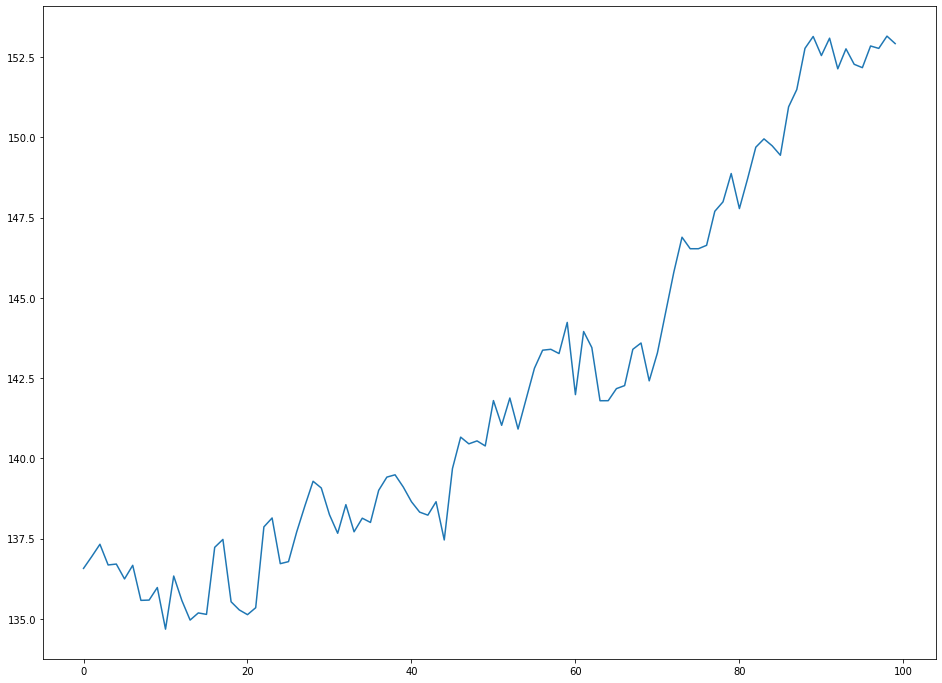

In [161]:
plt.figure(figsize=(16,12))
plt.plot(y_val[500:600])

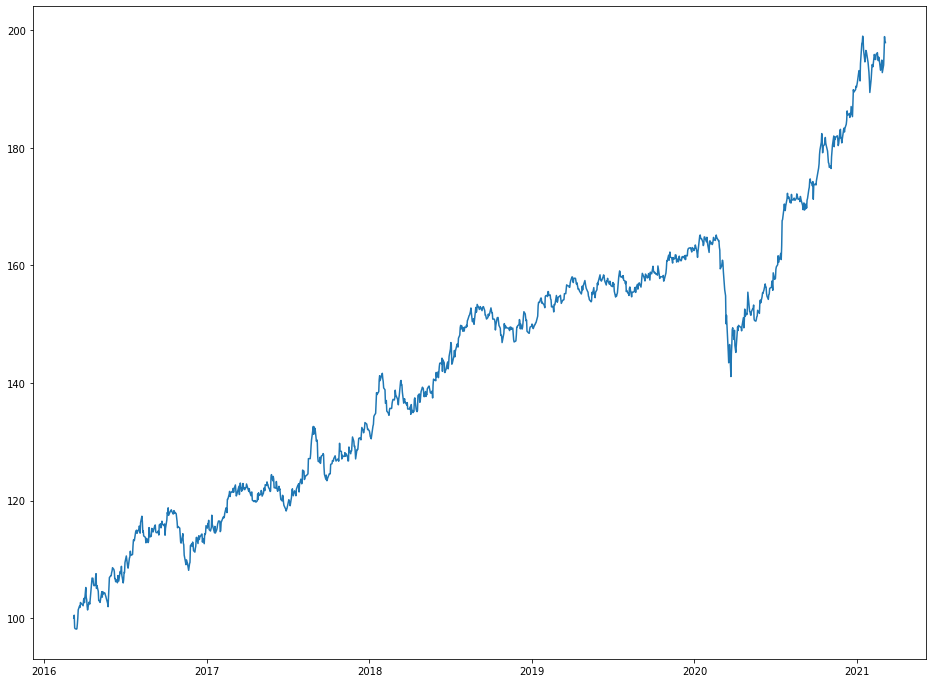

In [156]:
plt.figure(figsize=(16,12))
plt.plot(pd.to_datetime(date_index["Date"]),y_val)

To get the dates

In [162]:
cagr = ((y_val[len(y_val)-1]/y_val[0])**(0.2))-1
cagr

0.15011077097029557

In [164]:
stocks = web.DataReader("BSE:RELIANCE", "av-daily", start=start_date, end=date(2021, 3, 6), api_key=ALPHAVANTAGE_API_KEY)
stocks["Date"]=stocks.index
date_index = pd.DataFrame(stocks["Date"])
date_index.to_csv("date_index.csv", index=False)
stocks

,open,high,low,close,volume,Date
2016-03-08,1005.9996,1030.9997,1005.9996,1027.1498,856784,2016-03-08
2016-03-09,1018.9998,1043.9996,1017.3496,1041.9497,742581,2016-03-09
2016-03-10,1043.6996,1044.9996,1008.9997,1011.9998,716431,2016-03-10
2016-03-11,1016.4996,1029.4997,1011.2998,1015.6498,500851,2016-03-11
2016-03-14,1018.1498,1025.9997,1012.9996,1018.5497,415948,2016-03-14
...,...,...,...,...,...,...
2021-03-01,2114.4500,2114.4500,2063.2000,2101.1499,366701,2021-03-01
2021-03-02,2124.0000,2130.0000,2089.2500,2106.2000,269778,2021-03-02
2021-03-03,2121.7000,2220.0000,2107.2000,2201.3501,1101111,2021-03-03
2021-03-04,2179.7000,2189.6499,2158.0000,2175.7000,1316695,2021-03-04


In [154]:
date_index

,Date
2016-03-08,2016-03-08
2016-03-09,2016-03-09
2016-03-10,2016-03-10
2016-03-11,2016-03-11
2016-03-14,2016-03-14
...,...
2021-03-01,2021-03-01
2021-03-02,2021-03-02
2021-03-03,2021-03-03
2021-03-04,2021-03-04
